## SETUP

In [42]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy

In [127]:
# função de configuração de visualizações bar plot horizontais
def my_barh_plot(data, title, figsize=(10,5)):

    matplotlib.rcParams.update({'font.size': 14})

    fig, ax = plt.subplots(figsize=figsize)
    y_pos = [i for i in range(0,len(data))]
    x_values = list(data)
    ax.barh(y_pos, x_values, height=0.7)
    ax.set_title(title)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(data.index))
    plt.xlim((0,max(x_values)*1.2))
    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Use Y value as label and format number with one decimal place
        label = "{:}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(5, 5),              #  Shift label (horizontally,vertically)
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='left',                  # Horizontal label alignment
            va='top')                   # Vertical label alignment

    plt.show()

## BASES

Base: https://data.worldbank.org/indicator/SN.ITK.DEFC.ZS

In [88]:
dfHunger = pd.read_csv('datasets/hunger.csv')

In [89]:
dfHunger.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,Angola,AGO,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,Albania,ALB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,Andorra,AND,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,United Arab Emirates,ARE,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,Argentina,ARG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,Armenia,ARM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,American Samoa,ASM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
dfHunger.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997        

In [92]:
countryCodeHunger2016 = {}
for i in range(0, dfHunger.shape[0]):
    country_code = dfHunger.loc[i]["Country Code"]
    hungry2016 = dfHunger.loc[i]["2016"]
    if not numpy.isnan(hungry2016):
        countryCodeHunger2016[country_code] = hungry2016

In [93]:
countryCodeHunger2016

{'AFG': 30.3,
 'AGO': 23.9,
 'ALB': 5.5,
 'ARB': 12.051903242093301,
 'ARE': 2.5,
 'ARG': 3.8,
 'ARM': 4.3,
 'AUS': 2.5,
 'AUT': 2.5,
 'AZE': 2.5,
 'BEL': 2.5,
 'BEN': 10.4,
 'BFA': 21.3,
 'BGD': 15.2,
 'BGR': 3.0,
 'BIH': 2.5,
 'BLR': 2.5,
 'BLZ': 6.5,
 'BOL': 19.8,
 'BRA': 2.5,
 'BRB': 3.7,
 'BRN': 2.6,
 'BWA': 28.5,
 'CAF': 61.8,
 'CAN': 2.5,
 'CEB': 2.54898140473599,
 'CHE': 2.5,
 'CHL': 3.3,
 'CHN': 8.7,
 'CIV': 20.7,
 'CMR': 7.3,
 'COG': 37.5,
 'COL': 6.5,
 'CPV': 12.3,
 'CRI': 4.4,
 'CSS': 7.301093429660799,
 'CUB': 2.5,
 'CYP': 4.6,
 'CZE': 2.5,
 'DEU': 2.5,
 'DJI': 19.7,
 'DMA': 5.2,
 'DNK': 2.5,
 'DOM': 10.4,
 'DZA': 4.7,
 'EAP': 9.446782230696789,
 'EAR': 12.9873826032795,
 'EAS': 8.73129376362563,
 'ECA': 3.2373262947677004,
 'ECS': 2.83247400988108,
 'ECU': 7.8,
 'EGY': 4.8,
 'EMU': 2.5115618442283703,
 'ESP': 2.5,
 'EST': 2.8,
 'ETH': 21.4,
 'EUU': 2.51467488086654,
 'FCS': 26.1502685512885,
 'FIN': 2.5,
 'FJI': 4.4,
 'FRA': 2.5,
 'GAB': 9.4,
 'GBR': 2.5,
 'GEO': 7.4,
 'G

In [94]:
pdHunger_country_region_income = pd.read_csv('datasets/hunger_country_region_income.csv')

In [95]:
pdHunger_country_region_income.head(10)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
6,ARE,Middle East & North Africa,High income,National Bureau of Statistics & Federal Compet...,United Arab Emirates,NaN
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census (I...,Argentina,NaN
8,ARM,Europe & Central Asia,Upper middle income,National Statistical Service of the Republic o...,Armenia,NaN
9,ASM,East Asia & Pacific,Upper middle income,BEA: https://www.bea.gov/national/gdp_territor...,American Samoa,NaN


In [96]:
dfHunger_country_region_income = pd.DataFrame(pdHunger_country_region_income)

In [97]:
dfHunger_country_region_income.loc[0]

Country Code                                                  ABW
Region                                  Latin America & Caribbean
IncomeGroup                                           High income
SpecialNotes    Central Bureau of Statistics and Central Bank ...
TableName                                                   Aruba
Unnamed: 5                                                    NaN
Name: 0, dtype: object

In [98]:
countrysIncome = {}
for i in range(0, dfHunger_country_region_income.shape[0]):
    income = dfHunger_country_region_income.loc[i]["IncomeGroup"]
    country_code = dfHunger_country_region_income.loc[i]["Country Code"]
    if income in countrysIncome:
        countrysIncome[income].append(country_code)
    else:
        countrysIncome[income] = []
        countrysIncome[income].append(country_code)

In [99]:
countrysIncome

{'High income': ['ABW',
  'AND',
  'ARE',
  'ARG',
  'ATG',
  'AUS',
  'AUT',
  'BEL',
  'BHR',
  'BHS',
  'BMU',
  'BRB',
  'BRN',
  'CAN',
  'CHE',
  'CHI',
  'CHL',
  'CUW',
  'CYM',
  'CYP',
  'CZE',
  'DEU',
  'DNK',
  'ESP',
  'EST',
  'FIN',
  'FRA',
  'FRO',
  'GBR',
  'GIB',
  'GRC',
  'GRL',
  'GUM',
  'HKG',
  'HRV',
  'HUN',
  'IMN',
  'IRL',
  'ISL',
  'ISR',
  'ITA',
  'JPN',
  'KNA',
  'KOR',
  'KWT',
  'LIE',
  'LTU',
  'LUX',
  'LVA',
  'MAC',
  'MAF',
  'MCO',
  'MLT',
  'MNP',
  'NCL',
  'NLD',
  'NOR',
  'NZL',
  'OMN',
  'PAN',
  'PLW',
  'POL',
  'PRI',
  'PRT',
  'PYF',
  'QAT',
  'SAU',
  'SGP',
  'SMR',
  'SVK',
  'SVN',
  'SWE',
  'SXM',
  'SYC',
  'TCA',
  'TTO',
  'URY',
  'USA',
  'VGB',
  'VIR'],
 'Low income': ['AFG',
  'BDI',
  'BEN',
  'BFA',
  'CAF',
  'COD',
  'COM',
  'ERI',
  'ETH',
  'GIN',
  'GMB',
  'GNB',
  'HTI',
  'LBR',
  'MDG',
  'MLI',
  'MOZ',
  'MWI',
  'NER',
  'NPL',
  'PRK',
  'RWA',
  'SEN',
  'SLE',
  'SOM',
  'SSD',
  'SYR',
  'TCD'

In [120]:
mediaHungry = {}
totalHungry = {}
for key in countrysIncome.keys():
    
    try:
        float(key)
        continue
    except ValueError:
        print("Not a float")
        
    if key is not float:
        if key not in mediaHungry:
            mediaHungry[key] = 0
        if key not in totalHungry:
            totalHungry[key] = 0

        for country in countrysIncome[key]:
            if country in countryCodeHunger2016:
                mediaHungry[key] = mediaHungry[key] + countryCodeHunger2016[country]
                totalHungry[key] = totalHungry[key] + 1


Not a float
Not a float
Not a float
Not a float


In [121]:
mediaHungry

{'High income': 168.4,
 'Low income': 741.5000000000001,
 'Lower middle income': 595.2999999999998,
 'Upper middle income': 350.8000000000001}

In [122]:
totalHungry

{'High income': 51,
 'Low income': 26,
 'Lower middle income': 41,
 'Upper middle income': 47}

In [123]:
for key in mediaHungry.keys():
    mediaHungry[key] = mediaHungry[key]/totalHungry[key]
        

In [124]:
mediaHungry

{'High income': 3.3019607843137257,
 'Low income': 28.519230769230774,
 'Lower middle income': 14.519512195121948,
 'Upper middle income': 7.4638297872340456}

In [125]:
dfmediaHungry = pd.DataFrame(mediaHungry, index=[0])

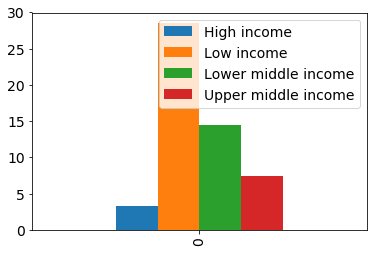

In [132]:
dfmediaHungry.plot.bar()
plt.show()